# Market Basket Analysis with Python - eBay

#### 1. Project Objective

#### 📌 1. Overview

This project analyzes customer behavior and perception of personalized recommendations using survey data from an e-commerce platform (eBay). The analysis focuses on purchase behavior, browsing patterns, satisfaction levels, review trust, and the effectiveness of personalized recommendations to derive actionable business insights.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### 2. Dataset Overview

In [2]:
df = pd.read_csv(r"D:\Internshala Projects\Ebay Project\eBay.csv")
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023/06/07 11:44:55 AM GMT+5:30,32,Prefer not to say,Multiple times a week,Groceries and Gourmet Food;Home and Kitchen,Sometimes,Rarely,categories,Multiple pages,5,...,Yes,Never,Yes,5,Yes,1,1,Customer service,.,819284
1,2023/06/07 9:28:09 AM GMT+5:30,47,Female,Multiple times a week,Groceries and Gourmet Food;Beauty and Personal...,No,Few times a month,NaN,First page,5,...,Yes,Never,Sometimes,2,Yes,4,4,User-friendly website/app interface,Shipping speed and reliability,599249
2,2023/06/05 10:09:03 PM GMT+5:30,50,Female,Once a month,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Multiple times a day,categories,Multiple pages,1,...,Yes,Rarely,Sometimes,1,Sometimes,4,2,Customer service,Reducing packaging waste,432245
3,2023/06/07 5:58:12 PM GMT+5:30,6,Others,Once a month,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,others,Multiple pages,1,...,No,Heavily,No,2,Yes,4,4,Product recommendations,Irrelevant product suggestions,476517
4,2023/06/07 11:46:52 AM GMT+5:30,61,Male,Once a week,Groceries and Gourmet Food;Clothing and Fashion,Yes,Rarely,NaN,Multiple pages,5,...,No,Never,Yes,2,No,3,2,Product recommendations,Shipping speed and reliability,894659


In [3]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction'],
      dtype='object')

#### 3. Data Cleaning and Preprocessing

In [4]:
df.isnull().sum()

Timestamp                                   0
age                                         0
Gender                                      0
Purchase_Frequency                          0
Purchase_Categories                         0
Personalized_Recommendation_Frequency       0
Browsing_Frequency                          0
Product_Search_Method                     161
Search_Result_Exploration                   0
Customer_Reviews_Importance                 0
Add_to_Cart_Browsing                        0
Cart_Completion_Frequency                   0
Cart_Abandonment_Factors                    0
Saveforlater_Frequency                      0
Review_Left                                 0
Review_Reliability                          0
Review_Helpfulness                          0
Personalized_Recommendation_Frequency       0
Recommendation_Helpfulness                  0
Rating_Accuracy                             0
Shopping_Satisfaction                       0
Service_Appreciation              

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               800 non-null    object
 1   age                                     800 non-null    int64 
 2   Gender                                  800 non-null    object
 3   Purchase_Frequency                      800 non-null    object
 4   Purchase_Categories                     800 non-null    object
 5   Personalized_Recommendation_Frequency   800 non-null    object
 6   Browsing_Frequency                      800 non-null    object
 7   Product_Search_Method                   639 non-null    object
 8   Search_Result_Exploration               800 non-null    object
 9   Customer_Reviews_Importance             800 non-null    int64 
 10  Add_to_Cart_Browsing                    800 non-null    object
 11  Cart_C

#### Remove duplicate or inconsistent survey responses.

In [6]:
df.duplicated().sum()

0

As We can See We Dont have an duplicated values Not neccesaary to drop any of it

In [7]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction'],
      dtype='object')

In [8]:
df.shape

(800, 24)

In [9]:
df['Gender'].value_counts()

Gender
Others               209
Prefer not to say    202
Female               198
Male                 191
Name: count, dtype: int64

In [10]:
df['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few times a month         172
Less than once a month    172
Once a month              160
Multiple times a week     148
Once a week               148
Name: count, dtype: int64

In [11]:
df['Product_Search_Method'].value_counts()

Product_Search_Method
Keyword       175
others        164
categories    158
Filter        142
Name: count, dtype: int64

Standardizing text responses

In [12]:
df["Gender"] = df["Gender"].astype(str).str.strip().str.title()
df["Purchase_Frequency"] = df["Purchase_Frequency"].astype(str).str.strip().str.title()
df["Product_Search_Method"] = df["Product_Search_Method"].astype(str).str.strip().str.title()

In [13]:
df['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few Times A Month         172
Less Than Once A Month    172
Once A Month              160
Multiple Times A Week     148
Once A Week               148
Name: count, dtype: int64

In [14]:
df['Review_Left'].value_counts()

Review_Left
Yes    413
No     387
Name: count, dtype: int64

In [15]:
df['Review_Reliability'].value_counts()

Review_Reliability
Rarely          185
Never           164
Moderately      159
Heavily         150
Occasionally    142
Name: count, dtype: int64

In [16]:
df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Yes      283
No       266
Maybe    251
Name: count, dtype: int64

Handle missing values and inconsistent formats in Product_Search_Method and other
fields

In [17]:
df['Product_Search_Method'].value_counts()

Product_Search_Method
Keyword       175
Others        164
Nan           161
Categories    158
Filter        142
Name: count, dtype: int64

In [18]:
df['Product_Search_Method'] = df['Product_Search_Method'].replace("Nan", np.nan)
df['Product_Search_Method'] = df['Product_Search_Method'].fillna("Unknown")

In [19]:
df['Product_Search_Method'].value_counts()

Product_Search_Method
Keyword       175
Others        164
Unknown       161
Categories    158
Filter        142
Name: count, dtype: int64

In [20]:
yes_no_cols = ['Review_Left', 'Add_to_Cart_Browsing']
for col in yes_no_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

In [21]:
df['Review_Helpfulness'].value_counts()

Review_Helpfulness
Sometimes    286
Yes          263
No           251
Name: count, dtype: int64

In [22]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023/06/07 11:44:55 AM GMT+5:30,32,Prefer Not To Say,Multiple Times A Week,Groceries and Gourmet Food;Home and Kitchen,Sometimes,Rarely,Categories,Multiple pages,5,...,Yes,Never,Yes,5,Yes,1,1,Customer service,.,819284
1,2023/06/07 9:28:09 AM GMT+5:30,47,Female,Multiple Times A Week,Groceries and Gourmet Food;Beauty and Personal...,No,Few times a month,Unknown,First page,5,...,Yes,Never,Sometimes,2,Yes,4,4,User-friendly website/app interface,Shipping speed and reliability,599249
2,2023/06/05 10:09:03 PM GMT+5:30,50,Female,Once A Month,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Multiple times a day,Categories,Multiple pages,1,...,Yes,Rarely,Sometimes,1,Sometimes,4,2,Customer service,Reducing packaging waste,432245
3,2023/06/07 5:58:12 PM GMT+5:30,6,Others,Once A Month,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,Others,Multiple pages,1,...,No,Heavily,No,2,Yes,4,4,Product recommendations,Irrelevant product suggestions,476517
4,2023/06/07 11:46:52 AM GMT+5:30,61,Male,Once A Week,Groceries and Gourmet Food;Clothing and Fashion,Yes,Rarely,Unknown,Multiple pages,5,...,No,Never,Yes,2,No,3,2,Product recommendations,Shipping speed and reliability,894659


In [23]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

C:\Users\Asus\AppData\Local\Temp\ipykernel_11504\3212250920.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


In [24]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023-06-07 11:44:55-05:30,32,Prefer Not To Say,Multiple Times A Week,Groceries and Gourmet Food;Home and Kitchen,Sometimes,Rarely,Categories,Multiple pages,5,...,Yes,Never,Yes,5,Yes,1,1,Customer service,.,819284
1,2023-06-07 09:28:09-05:30,47,Female,Multiple Times A Week,Groceries and Gourmet Food;Beauty and Personal...,No,Few times a month,Unknown,First page,5,...,Yes,Never,Sometimes,2,Yes,4,4,User-friendly website/app interface,Shipping speed and reliability,599249
2,2023-06-05 22:09:03-05:30,50,Female,Once A Month,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Multiple times a day,Categories,Multiple pages,1,...,Yes,Rarely,Sometimes,1,Sometimes,4,2,Customer service,Reducing packaging waste,432245
3,2023-06-07 17:58:12-05:30,6,Others,Once A Month,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,Others,Multiple pages,1,...,No,Heavily,No,2,Yes,4,4,Product recommendations,Irrelevant product suggestions,476517
4,2023-06-07 11:46:52-05:30,61,Male,Once A Week,Groceries and Gourmet Food;Clothing and Fashion,Yes,Rarely,Unknown,Multiple pages,5,...,No,Never,Yes,2,No,3,2,Product recommendations,Shipping speed and reliability,894659


In [25]:
df['Date'] = df['Timestamp'].dt.date

In [26]:
df['Timestamp'] = df['Timestamp'].dt.date

In [27]:
df['Timestamp'].dtype

dtype('O')

In [28]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11504\4208827248.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', infer_datetime_format=True)


In [29]:
df['Timestamp'].dtype

dtype('<M8[ns]')

In [30]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Weekday'] = df['Timestamp'].dt.day_name()

In [31]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction,Date,Year,Month,Day,Weekday
0,2023-06-07,32,Prefer Not To Say,Multiple Times A Week,Groceries and Gourmet Food;Home and Kitchen,Sometimes,Rarely,Categories,Multiple pages,5,...,1,1,Customer service,.,819284,2023-06-07,2023,6,7,Wednesday
1,2023-06-07,47,Female,Multiple Times A Week,Groceries and Gourmet Food;Beauty and Personal...,No,Few times a month,Unknown,First page,5,...,4,4,User-friendly website/app interface,Shipping speed and reliability,599249,2023-06-07,2023,6,7,Wednesday
2,2023-06-05,50,Female,Once A Month,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Multiple times a day,Categories,Multiple pages,1,...,4,2,Customer service,Reducing packaging waste,432245,2023-06-05,2023,6,5,Monday
3,2023-06-07,6,Others,Once A Month,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,Others,Multiple pages,1,...,4,4,Product recommendations,Irrelevant product suggestions,476517,2023-06-07,2023,6,7,Wednesday
4,2023-06-07,61,Male,Once A Week,Groceries and Gourmet Food;Clothing and Fashion,Yes,Rarely,Unknown,Multiple pages,5,...,3,2,Product recommendations,Shipping speed and reliability,894659,2023-06-07,2023,6,7,Wednesday


In [32]:
df['Timestamp'].isna().sum()

0

In [33]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction', 'Date', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

In [34]:
df['Improvement_Areas'].value_counts()

Improvement_Areas
Scrolling option would be much better than going to next page                     60
Shipping speed and reliability                                                    51
.                                                                                 50
User interface                                                                    49
Quality of product is very poor according to the big offers                       49
No problems with Amazon                                                           46
Product quality and accuracy                                                      46
I have no problem with Amazon yet. But others tell me about the refund issues     45
Nil                                                                               45
User interface of app                                                             44
Irrelevant product suggestions                                                    41
I don't have any problem with Amazon           

In [35]:
df['Improvement_Areas'] = df['Improvement_Areas'].replace('.', 'Not Available')
df['Improvement_Areas'].value_counts()

Improvement_Areas
Scrolling option would be much better than going to next page                     60
Shipping speed and reliability                                                    51
Not Available                                                                     50
User interface                                                                    49
Quality of product is very poor according to the big offers                       49
No problems with Amazon                                                           46
Product quality and accuracy                                                      46
I have no problem with Amazon yet. But others tell me about the refund issues     45
Nil                                                                               45
User interface of app                                                             44
Irrelevant product suggestions                                                    41
I don't have any problem with Amazon           

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Timestamp                               800 non-null    datetime64[ns]
 1   age                                     800 non-null    int64         
 2   Gender                                  800 non-null    object        
 3   Purchase_Frequency                      800 non-null    object        
 4   Purchase_Categories                     800 non-null    object        
 5   Personalized_Recommendation_Frequency   800 non-null    object        
 6   Browsing_Frequency                      800 non-null    object        
 7   Product_Search_Method                   800 non-null    object        
 8   Search_Result_Exploration               800 non-null    object        
 9   Customer_Reviews_Importance             800 non-null  

### 📌 2. Data Preparation & Cleaning

Removed duplicates and handled missing values

Converted timestamp into date-based features (Year, Month, Weekday)

Standardized categorical variables (Yes / No / Sometimes, frequency levels)

Encoded ordinal variables for analytical purposes

Transformed multi-label purchase categories using explode for accurate category-level analysis

Convert numerical rating columns (e.g., Customer_Reviews_Importance,
Shopping_Satisfaction) to appropriate numeric types for analysis.

#### 4. Exploratory Data Analysis (EDA)

## Task 2: Descriptive Behavior Analysis 

Splitting the Product_categories 

In [37]:
df['Purchase_Categories'] = df['Purchase_Categories'].str.split(';')

In [38]:
df_exploded = df.explode('Purchase_Categories')

In [39]:
df_exploded['Purchase_Categories'] = (
    df_exploded['Purchase_Categories']
    .str.strip()
    .str.title()
)

In [40]:
category_counts = df_exploded['Purchase_Categories'].value_counts()
print(category_counts)

Purchase_Categories
Clothing And Fashion          450
Home And Kitchen              421
Beauty And Personal Care      418
Others                        390
Groceries And Gourmet Food    366
Name: count, dtype: int64


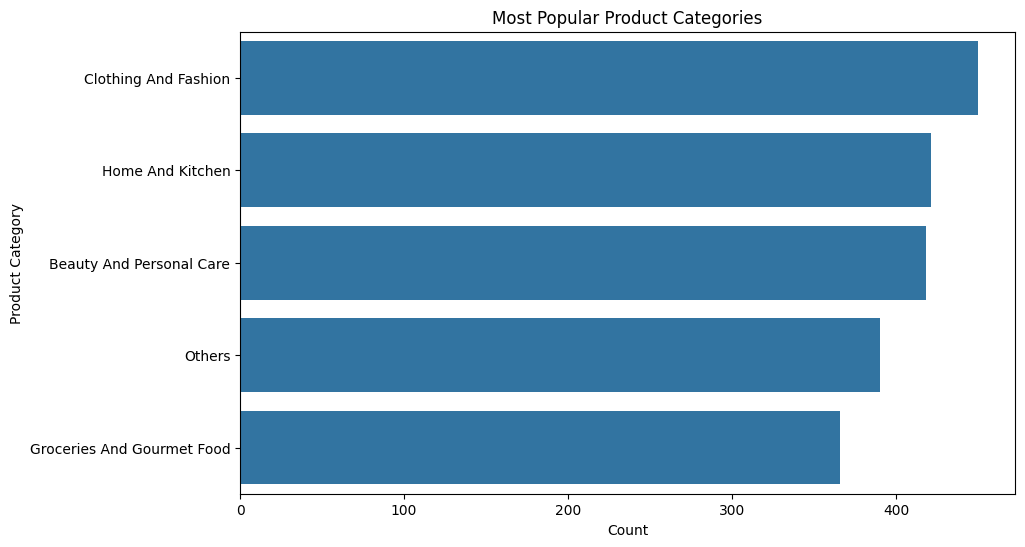

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(
    y=category_counts.index,
    x=category_counts.values
)
plt.title("Most Popular Product Categories")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.show()

#### 4.1 Customer Demographics Analysis

In [42]:
# AGE SUMMARY

In [43]:
print("Age Summary:")
print(df['age'].describe())

Age Summary:
count    800.000000
mean      35.730000
std       18.588141
min        3.000000
25%       19.000000
50%       37.000000
75%       52.000000
max       67.000000
Name: age, dtype: float64


In [44]:
# GENDER DISTRIBUTION
print("\nGender Distribution:")
print(df['Gender'].value_counts())
print("\nGender Distribution (%):")
print(df['Gender'].value_counts(normalize=True) * 100)


Gender Distribution:
Gender
Others               209
Prefer Not To Say    202
Female               198
Male                 191
Name: count, dtype: int64

Gender Distribution (%):
Gender
Others               26.125
Prefer Not To Say    25.250
Female               24.750
Male                 23.875
Name: proportion, dtype: float64


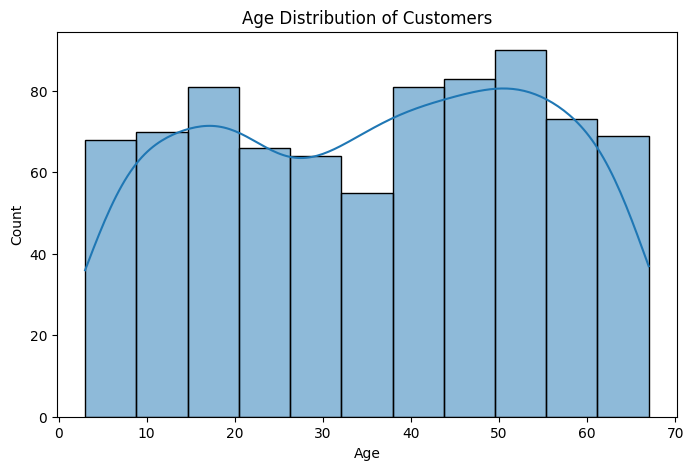

In [45]:
# AGE DISTRIBUTION PLOT
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

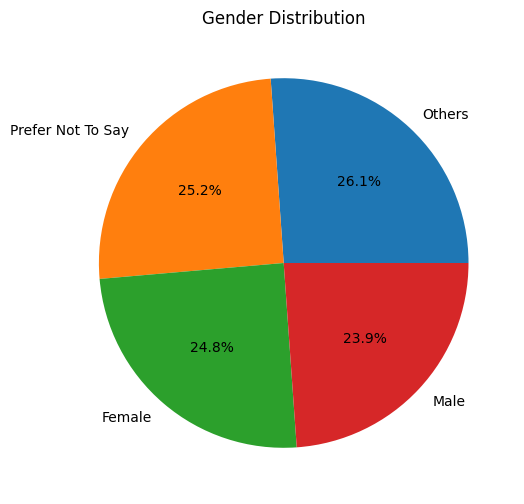

In [46]:
# GENDER PIE CHART
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

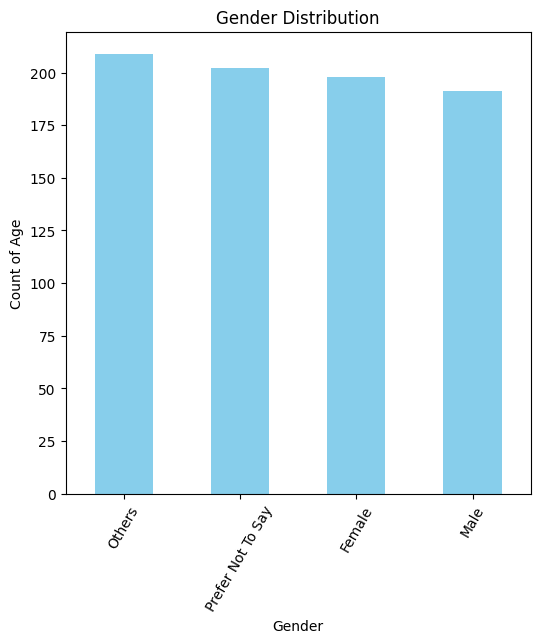

In [47]:
# GENDER Bar CHART
plt.figure(figsize=(6,6))
df['Gender'].value_counts().plot(kind='bar',color="Skyblue")
plt.title("Gender Distribution")
plt.ylabel("Count of Age")
plt.xticks(rotation =60)
plt.show()

#### 4.2 Purchase Behavior Analysis

In [48]:
# Analyze overall purchase frequency and most popular product categories.

Purchase Frequency Counts:
Purchase_Frequency
Few Times A Month         172
Less Than Once A Month    172
Once A Month              160
Multiple Times A Week     148
Once A Week               148
Name: count, dtype: int64

Purchase Frequency (%):
Purchase_Frequency
Few Times A Month         21.5
Less Than Once A Month    21.5
Once A Month              20.0
Multiple Times A Week     18.5
Once A Week               18.5
Name: proportion, dtype: float64


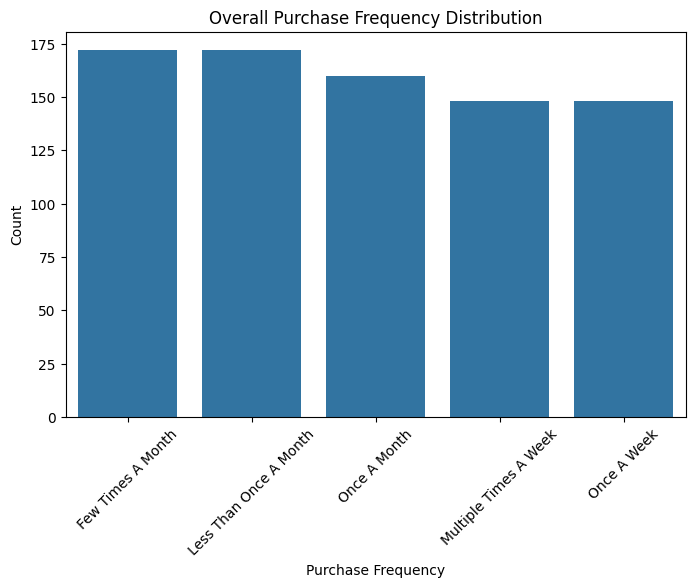

In [49]:
# PURCHASE FREQUENCY COUNTS
print("Purchase Frequency Counts:")
print(df['Purchase_Frequency'].value_counts())

print("\nPurchase Frequency (%):")
print(df['Purchase_Frequency'].value_counts(normalize=True) * 100)

# BAR PLOT – PURCHASE FREQUENCY
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Purchase_Frequency', order=df['Purchase_Frequency'].value_counts().index)
plt.title("Overall Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#### 4.3 Browsing Behavior Analysis

In [50]:
# PRODUCT CATEGORY COUNTS
print("\nProduct Category Counts:")
print(df['Purchase_Categories'].value_counts())


Product Category Counts:
Purchase_Categories
[Clothing and Fashion, others]                                                                            40
[Clothing and Fashion, Home and Kitchen, others]                                                          36
[Groceries and Gourmet Food, Beauty and Personal Care, Clothing and Fashion, Home and Kitchen]            35
[Groceries and Gourmet Food, Home and Kitchen]                                                            34
[Groceries and Gourmet Food, Clothing and Fashion, Home and Kitchen]                                      33
[Groceries and Gourmet Food, Beauty and Personal Care]                                                    33
[Beauty and Personal Care, Clothing and Fashion, Home and Kitchen]                                        33
[Beauty and Personal Care, Clothing and Fashion, Home and Kitchen, others]                                31
[others]                                                                          

In [51]:
print("\nProduct Category (%):")
print(df['Purchase_Categories'].value_counts(normalize=True) * 100)


Product Category (%):
Purchase_Categories
[Clothing and Fashion, others]                                                                            5.000
[Clothing and Fashion, Home and Kitchen, others]                                                          4.500
[Groceries and Gourmet Food, Beauty and Personal Care, Clothing and Fashion, Home and Kitchen]            4.375
[Groceries and Gourmet Food, Home and Kitchen]                                                            4.250
[Groceries and Gourmet Food, Clothing and Fashion, Home and Kitchen]                                      4.125
[Groceries and Gourmet Food, Beauty and Personal Care]                                                    4.125
[Beauty and Personal Care, Clothing and Fashion, Home and Kitchen]                                        4.125
[Beauty and Personal Care, Clothing and Fashion, Home and Kitchen, others]                                3.875
[others]                                                     

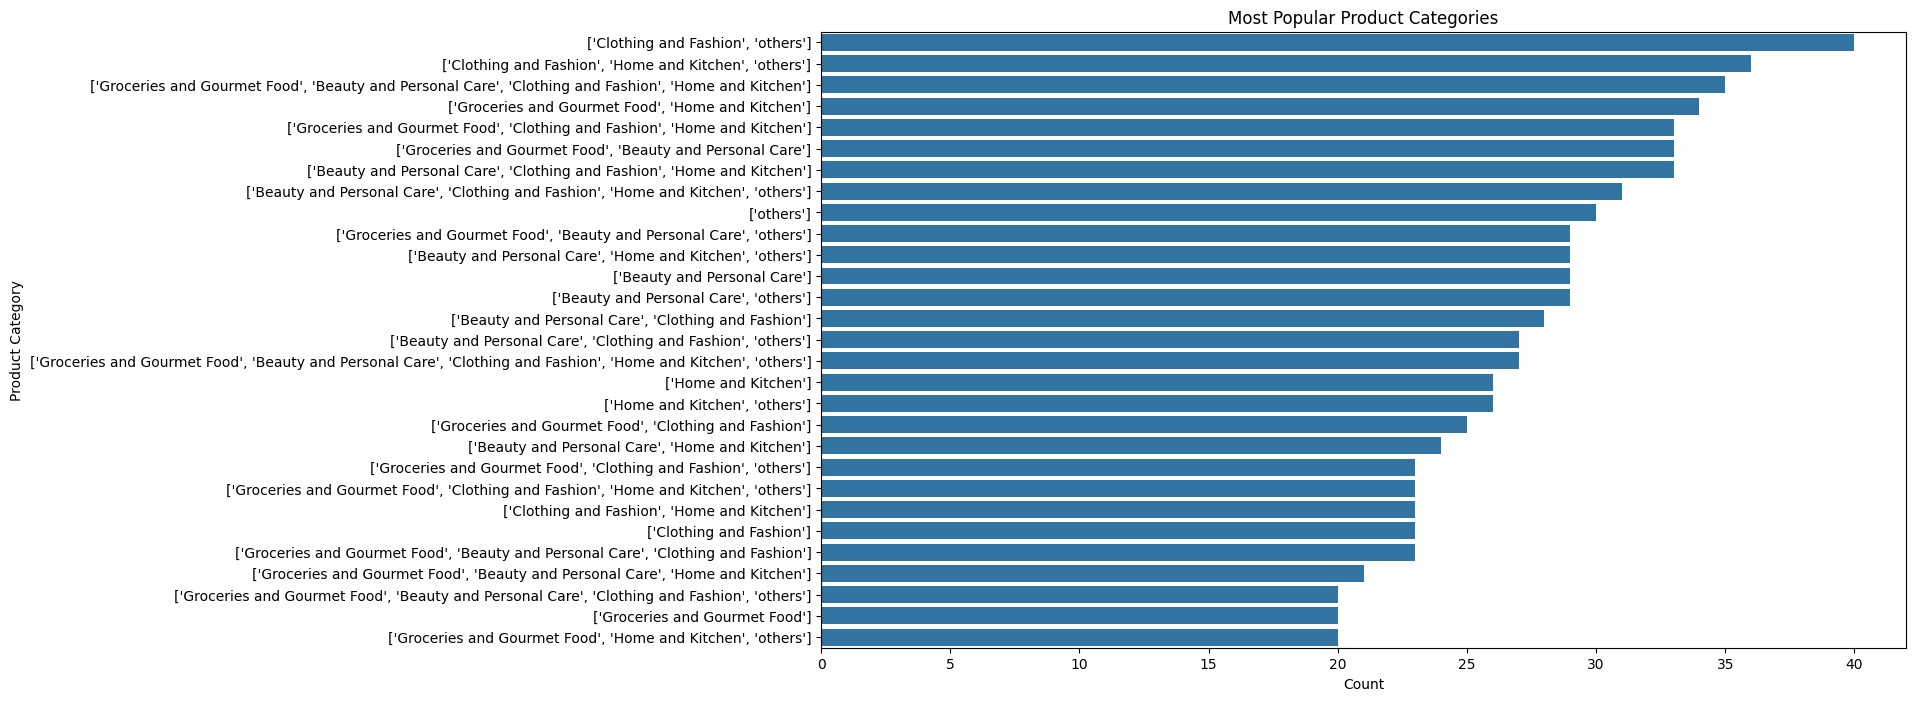

In [52]:
# BAR PLOT – POPULAR PRODUCT CATEGORIES
plt.figure(figsize=(14,8))
sns.countplot(data=df, y='Purchase_Categories', order=df['Purchase_Categories'].value_counts().index)
plt.title("Most Popular Product Categories")
plt.xlabel("Count")
plt.ylabel("Product Category")
plt.show()

#### 4.4 Customer Satisfaction Analysis

Identify top browsing methods and most common cart abandonment factors.


In [53]:
# BROWSING METHODS COUNTS
print("Browsing / Search Method Counts:")
print(df['Product_Search_Method'].value_counts())

Browsing / Search Method Counts:
Product_Search_Method
Keyword       175
Others        164
Unknown       161
Categories    158
Filter        142
Name: count, dtype: int64


In [54]:
print("\nBrowsing / Search Method (%):")
print(df['Product_Search_Method'].value_counts(normalize=True) * 100)


Browsing / Search Method (%):
Product_Search_Method
Keyword       21.875
Others        20.500
Unknown       20.125
Categories    19.750
Filter        17.750
Name: proportion, dtype: float64


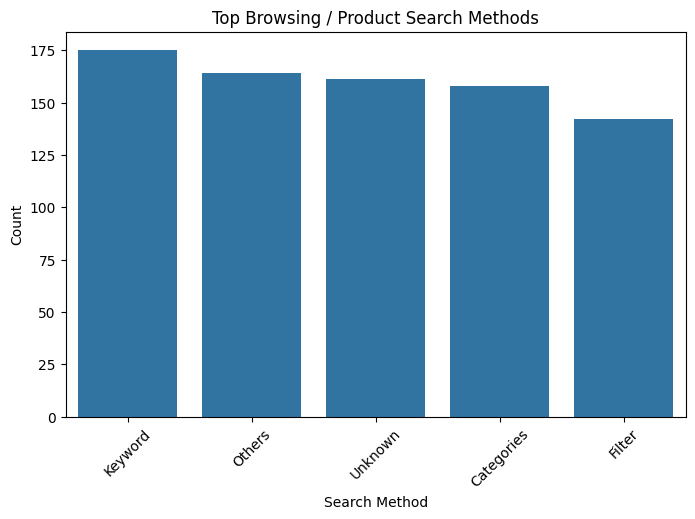

In [55]:
# BAR PLOT
plt.figure(figsize=(8,5))
sns.countplot(
    data=df, 
    x='Product_Search_Method', 
    order=df['Product_Search_Method'].value_counts().index
)
plt.title("Top Browsing / Product Search Methods")
plt.xlabel("Search Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [56]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction', 'Date', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

In [57]:
df['Cart_Abandonment_Factors'].value_counts()

Cart_Abandonment_Factors
High shipping costs                           208
others                                        204
Changed my mind or no longer need the item    204
Found a better price elsewhere                184
Name: count, dtype: int64

In [58]:
factor_counts = df['Cart_Abandonment_Factors'].value_counts()

In [59]:
print("\nPercentage:")
print(factor_counts / factor_counts.sum() * 100)


Percentage:
Cart_Abandonment_Factors
High shipping costs                           26.0
others                                        25.5
Changed my mind or no longer need the item    25.5
Found a better price elsewhere                23.0
Name: count, dtype: float64


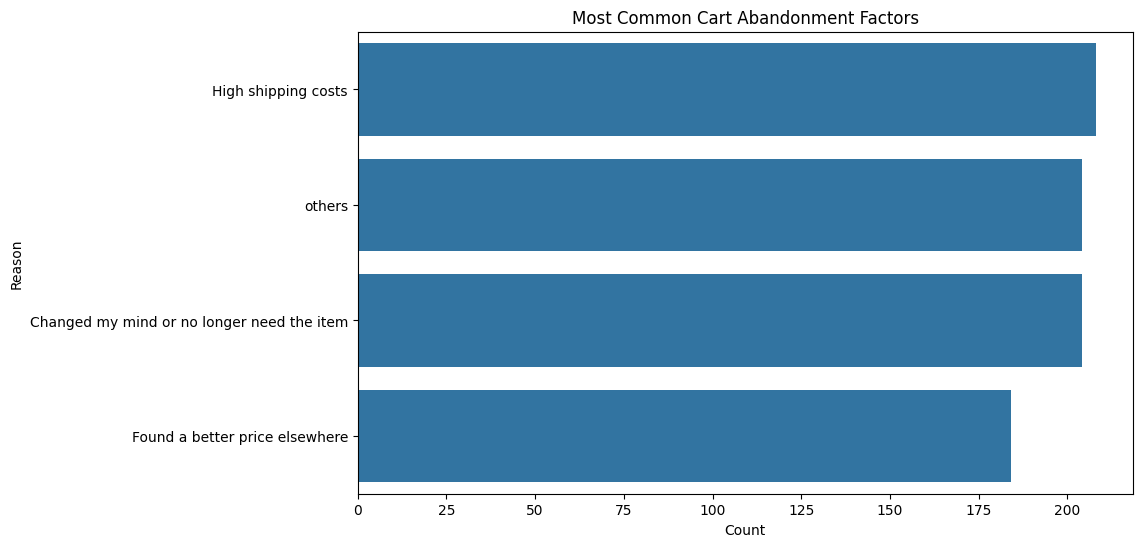

In [60]:
# STEP 5: Visualization
plt.figure(figsize=(10,6))
sns.barplot(
    y=factor_counts.index,
    x=factor_counts.values
)
plt.title("Most Common Cart Abandonment Factors")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

Calculate mean and median satisfaction, recommendation helpfulness, and rating
accuracy

In [61]:
df.head(2)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction,Date,Year,Month,Day,Weekday
0,2023-06-07,32,Prefer Not To Say,Multiple Times A Week,"[Groceries and Gourmet Food, Home and Kitchen]",Sometimes,Rarely,Categories,Multiple pages,5,...,1,1,Customer service,Not Available,819284,2023-06-07,2023,6,7,Wednesday
1,2023-06-07,47,Female,Multiple Times A Week,"[Groceries and Gourmet Food, Beauty and Person...",No,Few times a month,Unknown,First page,5,...,4,4,User-friendly website/app interface,Shipping speed and reliability,599249,2023-06-07,2023,6,7,Wednesday


In [62]:
df.columns = df.columns.str.strip()

In [63]:
df['Rating_Accuracy'].describe()

count    800.000000
mean       3.086250
std        1.420857
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Rating_Accuracy, dtype: float64

In [64]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction,Date,Year,Month,Day,Weekday
0,2023-06-07,32,Prefer Not To Say,Multiple Times A Week,"[Groceries and Gourmet Food, Home and Kitchen]",Sometimes,Rarely,Categories,Multiple pages,5,...,1,1,Customer service,Not Available,819284,2023-06-07,2023,6,7,Wednesday
1,2023-06-07,47,Female,Multiple Times A Week,"[Groceries and Gourmet Food, Beauty and Person...",No,Few times a month,Unknown,First page,5,...,4,4,User-friendly website/app interface,Shipping speed and reliability,599249,2023-06-07,2023,6,7,Wednesday
2,2023-06-05,50,Female,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",Sometimes,Multiple times a day,Categories,Multiple pages,1,...,4,2,Customer service,Reducing packaging waste,432245,2023-06-05,2023,6,5,Monday
3,2023-06-07,6,Others,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",No,Rarely,Others,Multiple pages,1,...,4,4,Product recommendations,Irrelevant product suggestions,476517,2023-06-07,2023,6,7,Wednesday
4,2023-06-07,61,Male,Once A Week,"[Groceries and Gourmet Food, Clothing and Fash...",Yes,Rarely,Unknown,Multiple pages,5,...,3,2,Product recommendations,Shipping speed and reliability,894659,2023-06-07,2023,6,7,Wednesday


In [65]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency', 'Recommendation_Helpfulness',
       'Rating_Accuracy', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction', 'Date', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

In [66]:
df.columns = df.columns.str.strip()

In [67]:
df.columns.tolist()

['Timestamp',
 'age',
 'Gender',
 'Purchase_Frequency',
 'Purchase_Categories',
 'Personalized_Recommendation_Frequency',
 'Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Customer_Reviews_Importance',
 'Add_to_Cart_Browsing',
 'Cart_Completion_Frequency',
 'Cart_Abandonment_Factors',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Personalized_Recommendation_Frequency',
 'Recommendation_Helpfulness',
 'Rating_Accuracy',
 'Shopping_Satisfaction',
 'Service_Appreciation',
 'Improvement_Areas',
 'transaction',
 'Date',
 'Year',
 'Month',
 'Day',
 'Weekday']

In [68]:
df = df.loc[:, ~df.columns.duplicated()]

In [69]:
df['Personalized_Recommendation_Frequency'].unique()

array(['Sometimes', 'No', 'Yes'], dtype=object)

In [70]:
df[['Customer_Reviews_Importance',
    'Rating_Accuracy', 
    'Shopping_Satisfaction']].describe()

,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction
count,800.000000,800.000000,800.000000
mean,3.001250,3.086250,2.866250
std,1.391463,1.420857,1.429481
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [71]:
df['Personalized_Recommendation_Frequency'].value_counts()

Personalized_Recommendation_Frequency
No           279
Yes          261
Sometimes    260
Name: count, dtype: int64

In [72]:
col = 'Personalized_Recommendation_Frequency'
print("\nValue counts (frequency):")
print(df[col].value_counts())

print("\nValue counts with percentages:")
print(df[col].value_counts(normalize=True) * 100)

print("\nData type:")
print(df[col].dtype)


Value counts (frequency):
Personalized_Recommendation_Frequency
No           279
Yes          261
Sometimes    260
Name: count, dtype: int64

Value counts with percentages:
Personalized_Recommendation_Frequency
No           34.875
Yes          32.625
Sometimes    32.500
Name: proportion, dtype: float64

Data type:
object


In [73]:
col = "Personalized_Recommendation_Frequency"

# Step 1: Standardize text values
df[col] = (
    df[col]
    .astype(str)
    .str.strip()
    .str.title()
)

# Step 2: Create your custom mapping
mapping = {
    "No": 0,
    "Yes": 1,
    "Sometimes": 2
}

# Step 3: Apply the mapping and create the new encoded column
df["Personalized_Recommendation_Frequency_Encoded"] = df[col].map(mapping)

In [74]:
metrics = ['Shopping_Satisfaction',
           'Personalized_Recommendation_Frequency_Encoded',
           'Rating_Accuracy']

for col in metrics:
    print(f"\n--- {col} ---")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())


--- Shopping_Satisfaction ---
Mean: 2.86625
Median: 3.0

--- Personalized_Recommendation_Frequency_Encoded ---
Mean: 0.97625
Median: 1.0

--- Rating_Accuracy ---
Mean: 3.08625
Median: 3.0


In [75]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'transaction', 'Date', 'Year', 'Month', 'Day', 'Weekday',
       'Personalized_Recommendation_Frequency_Encoded'],
      dtype='object')

In [76]:
df.describe()

,Timestamp,age,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction,transaction,Year,Month,Day,Personalized_Recommendation_Frequency_Encoded
count,800,800.000000,800.000000,800.000000,800.000000,800.000000,800.0,800.0,800.000000,800.000000
mean,2023-06-07 17:16:48,35.730000,3.001250,3.086250,2.866250,565664.540000,2023.0,6.0,7.720000,0.976250
min,2023-06-04 00:00:00,3.000000,1.000000,1.000000,1.000000,100154.000000,2023.0,6.0,4.000000,0.000000
25%,2023-06-06 00:00:00,19.000000,2.000000,2.000000,2.000000,337657.250000,2023.0,6.0,6.000000,0.000000
50%,2023-06-08 00:00:00,37.000000,3.000000,3.000000,3.000000,586346.500000,2023.0,6.0,8.000000,1.000000
75%,2023-06-09 00:00:00,52.000000,4.000000,4.000000,4.000000,790776.250000,2023.0,6.0,9.000000,2.000000
max,2023-06-16 00:00:00,67.000000,5.000000,5.000000,5.000000,999961.000000,2023.0,6.0,16.000000,2.000000
std,NaN,18.588141,1.391463,1.420857,1.429481,259825.653672,0.0,0.0,2.173132,0.820992


In [77]:
behavior_cols = [
    'Browsing_Frequency',
    'Product_Search_Method',
    'Purchase_Frequency',
    'Shopping_Satisfaction',
    'Rating_Accuracy',
    'Personalized_Recommendation_Frequency_Encoded',
    'Cart_Completion_Frequency'
]

print(df[behavior_cols].describe(include='all'))


       Browsing_Frequency Product_Search_Method Purchase_Frequency  \
count                 800                   800                800   
unique                  4                     5                  5   
top                Rarely               Keyword  Few Times A Month   
freq                  210                   175                172   
mean                  NaN                   NaN                NaN   
std                   NaN                   NaN                NaN   
min                   NaN                   NaN                NaN   
25%                   NaN                   NaN                NaN   
50%                   NaN                   NaN                NaN   
75%                   NaN                   NaN                NaN   
max                   NaN                   NaN                NaN   

        Shopping_Satisfaction  Rating_Accuracy  \
count              800.000000       800.000000   
unique                    NaN              NaN   
top      

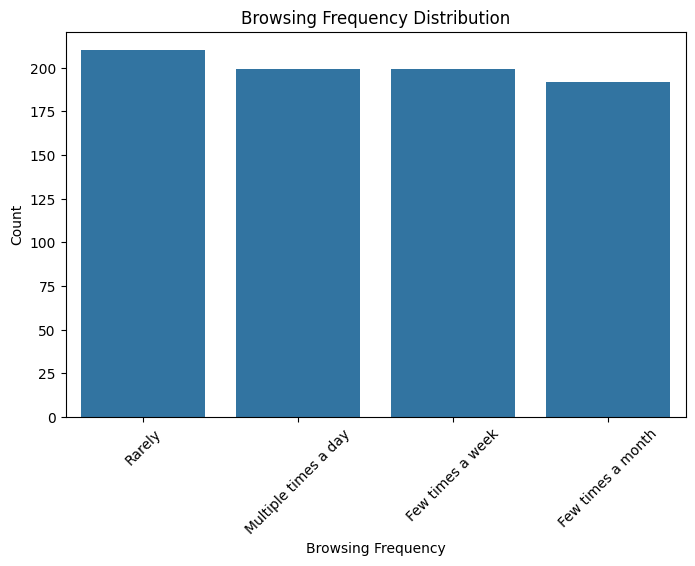

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Browsing_Frequency', order=df['Browsing_Frequency'].value_counts().index)
plt.title("Browsing Frequency Distribution")
plt.xlabel("Browsing Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


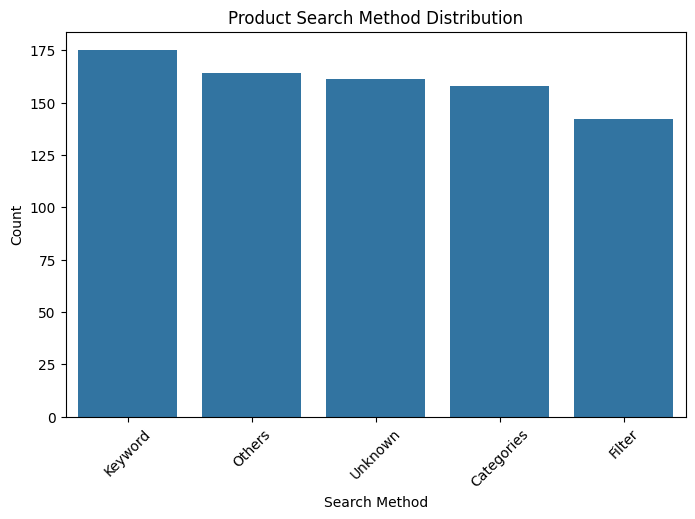

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Product_Search_Method', order=df['Product_Search_Method'].value_counts().index)
plt.title("Product Search Method Distribution")
plt.xlabel("Search Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

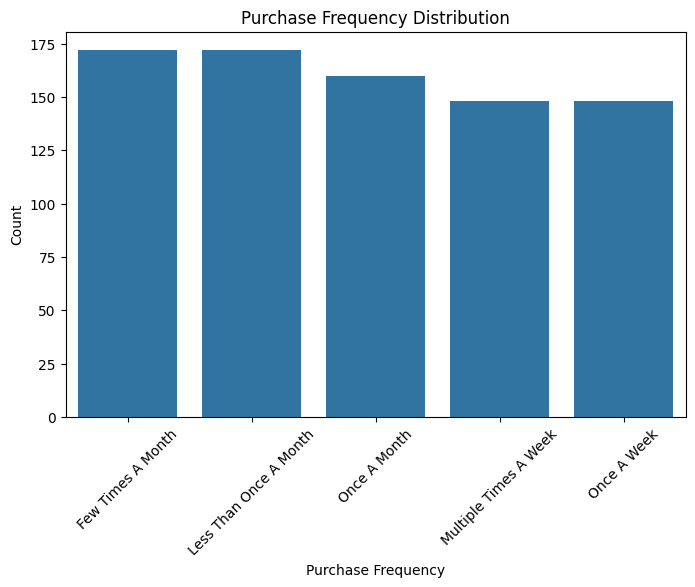

In [80]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Purchase_Frequency', order=df['Purchase_Frequency'].value_counts().index)
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

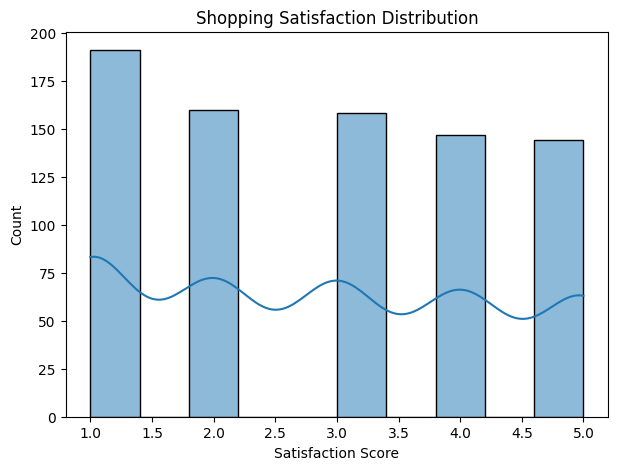

In [81]:
plt.figure(figsize=(7,5))
sns.histplot(df['Shopping_Satisfaction'], bins=10, kde=True)
plt.title("Shopping Satisfaction Distribution")
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.show()

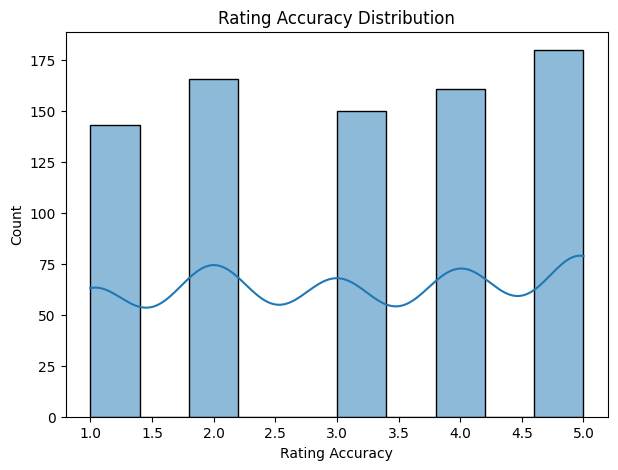

In [82]:
plt.figure(figsize=(7,5))
sns.histplot(df['Rating_Accuracy'], bins=10, kde=True)
plt.title("Rating Accuracy Distribution")
plt.xlabel("Rating Accuracy")
plt.ylabel("Count")
plt.show()

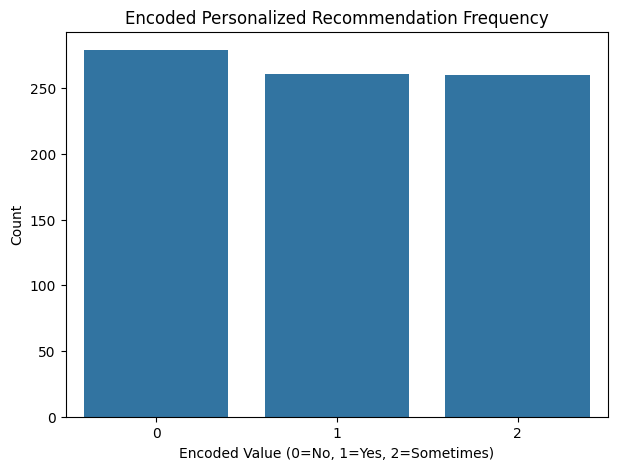

In [83]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Personalized_Recommendation_Frequency_Encoded')
plt.title("Encoded Personalized Recommendation Frequency")
plt.xlabel("Encoded Value (0=No, 1=Yes, 2=Sometimes)")
plt.ylabel("Count")
plt.show()

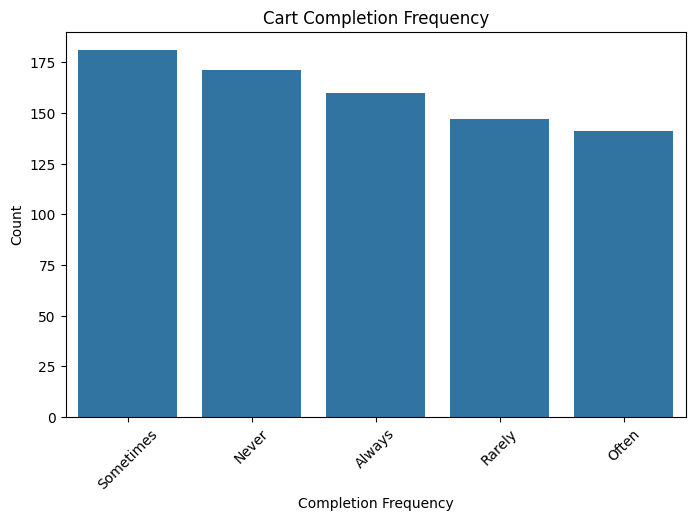

In [84]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Cart_Completion_Frequency', order=df['Cart_Completion_Frequency'].value_counts().index)
plt.title("Cart Completion Frequency")
plt.xlabel("Completion Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

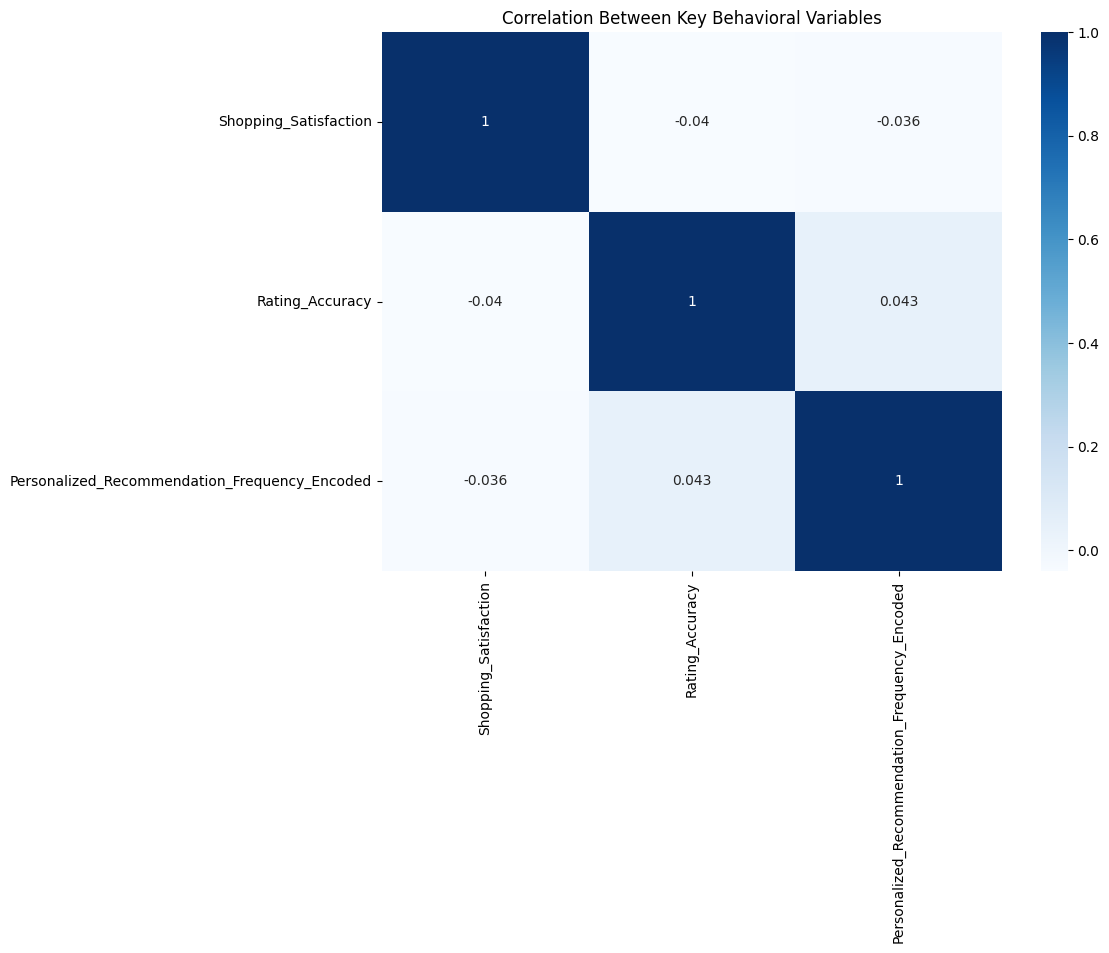

In [85]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['Shopping_Satisfaction', 'Rating_Accuracy', 
                'Personalized_Recommendation_Frequency_Encoded']]
            .corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Key Behavioral Variables")
plt.show()

#### 📌 3. Key Findings & Insights
🛒 Purchase Behavior

Customers commonly purchase from multiple categories, indicating cross-category buying behavior.

The most popular categories include:

Clothing and Fashion

Groceries and Gourmet Food

Home and Kitchen

Beauty and Personal Care

Treating purchase categories as multi-label data provided a more accurate view of category popularity.

🌐 Browsing Frequency

Browsing behavior is moderate overall, with many customers browsing occasionally rather than frequently.

This suggests opportunities to increase engagement through better personalization and reminders.

😊 Shopping Satisfaction

Average shopping satisfaction is moderate (around 3 on a 5-point scale).

Satisfaction levels are evenly spread, indicating mixed customer experiences.

Satisfaction is influenced by multiple factors, not recommendations alone.

🤖 Personalized Recommendation Engagement

Engagement with personalized recommendations is inconsistent.

The “Sometimes” response dominates, showing that recommendations are not always perceived as relevant.

Trust in recommendations is cautious, with nearly equal “Yes” and “No” responses.

🔍 Relationship Between Recommendations & Satisfaction

Customers who trust or engage with recommendations show slightly higher satisfaction, but the effect is weak to moderate.

This indicates that recommendations alone are not the primary driver of satisfaction.

⭐ Reviews & Ratings Impact

Review reliability has a stronger impact on rating accuracy than review helpfulness.

Customers trust ratings more when reviews are perceived as authentic and reliable.

This highlights the importance of credible reviews in shaping customer trust.

### Task 3: Customer Segmentation and Profiling 

Segment customers based on purchase frequency and shopping satisfaction levels.

In [86]:
df['Purchase_Frequency'].unique()

array(['Multiple Times A Week', 'Once A Month', 'Once A Week',
       'Few Times A Month', 'Less Than Once A Month'], dtype=object)

In [87]:
purchase_map = {
    "Multiple Times A Week": 0,
    "Once A Month": 1,
    "Once A Week": 2,
    "Few Times A Month": 3,
    "Less Than Once A Month": 4
}

In [88]:
df['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few Times A Month         172
Less Than Once A Month    172
Once A Month              160
Multiple Times A Week     148
Once A Week               148
Name: count, dtype: int64

In [89]:
df['Purchase_Frequency_Coded'] = df['Purchase_Frequency'].map(purchase_map)

In [90]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Service_Appreciation,Improvement_Areas,transaction,Date,Year,Month,Day,Weekday,Personalized_Recommendation_Frequency_Encoded,Purchase_Frequency_Coded
0,2023-06-07,32,Prefer Not To Say,Multiple Times A Week,"[Groceries and Gourmet Food, Home and Kitchen]",Sometimes,Rarely,Categories,Multiple pages,5,...,Customer service,Not Available,819284,2023-06-07,2023,6,7,Wednesday,2,0
1,2023-06-07,47,Female,Multiple Times A Week,"[Groceries and Gourmet Food, Beauty and Person...",No,Few times a month,Unknown,First page,5,...,User-friendly website/app interface,Shipping speed and reliability,599249,2023-06-07,2023,6,7,Wednesday,0,0
2,2023-06-05,50,Female,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",Sometimes,Multiple times a day,Categories,Multiple pages,1,...,Customer service,Reducing packaging waste,432245,2023-06-05,2023,6,5,Monday,2,1
3,2023-06-07,6,Others,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",No,Rarely,Others,Multiple pages,1,...,Product recommendations,Irrelevant product suggestions,476517,2023-06-07,2023,6,7,Wednesday,0,1
4,2023-06-07,61,Male,Once A Week,"[Groceries and Gourmet Food, Clothing and Fash...",Yes,Rarely,Unknown,Multiple pages,5,...,Product recommendations,Shipping speed and reliability,894659,2023-06-07,2023,6,7,Wednesday,1,2


In [91]:
df['Segment'] = "Other"

df.loc[
    (df['Purchase_Frequency_Coded'] >= 4) &
    (df['Shopping_Satisfaction'] >= 4),
    'Segment'
] = "Frequent Buyers"

In [92]:
df.loc[
    (df['Purchase_Frequency_Coded'].between(2, 3)) &
    (df['Shopping_Satisfaction'].between(3, 4)),
    'Segment'
] = "Occasional Shoppers"

In [93]:
df.loc[
    (df['Shopping_Satisfaction'] <= 2),
    'Segment'
] = "At-Risk Customers"

In [94]:
df['Segment'].value_counts()

Segment
At-Risk Customers      351
Other                  271
Occasional Shoppers    115
Frequent Buyers         63
Name: count, dtype: int64

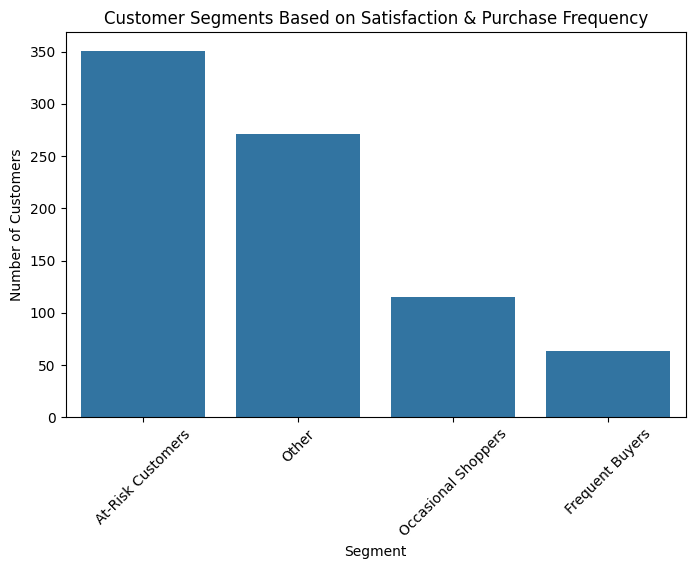

In [95]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Segment', order=df['Segment'].value_counts().index)
plt.title("Customer Segments Based on Satisfaction & Purchase Frequency")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### Create profiles such as:
* Frequent Buyers: High purchase frequency, high satisfaction.
* Occasional Shoppers: Medium frequency, moderate satisfaction.
* At-Risk Customers: Low satisfaction or frequent cart abandonment

In [96]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'transaction', 'Date', 'Year', 'Month', 'Day', 'Weekday',
       'Personalized_Recommendation_Frequency_Encoded',
       'Purchase_Frequency_Coded', 'Segment'],
      dtype='object')

In [97]:
df['Purchase_Frequency'].value_counts()

Purchase_Frequency
Few Times A Month         172
Less Than Once A Month    172
Once A Month              160
Multiple Times A Week     148
Once A Week               148
Name: count, dtype: int64

In [98]:
df['Purchase_Frequency_Coded'].value_counts()

Purchase_Frequency_Coded
3    172
4    172
1    160
0    148
2    148
Name: count, dtype: int64

In [99]:
clean_map = {
    "Less Than Once A Month": 0,
    "Once A Month": 1,
    "Few Times A Month": 2,
    "Once A Week": 3,
    "Multiple Times A Week": 4
}

df['Purchase_Frequency_Coded'] = df['Purchase_Frequency'].map(clean_map)

In [100]:
df['Shopping_Satisfaction'].value_counts()

Shopping_Satisfaction
1    191
2    160
3    158
4    147
5    144
Name: count, dtype: int64

In [101]:
df['Segment'].value_counts()

Segment
At-Risk Customers      351
Other                  271
Occasional Shoppers    115
Frequent Buyers         63
Name: count, dtype: int64

1️⃣ Frequent Buyers

In [102]:
df['Segment'] = 'Other'

df.loc[
    (df['Purchase_Frequency_Coded'] >= 3) &
    (df['Shopping_Satisfaction'] >= 4),
    'Segment'
] = 'Frequent Buyers'

2️⃣ Occasional Shoppers

* Medium purchase frequency → code 1–2
* Moderate satisfaction → 3–4

In [103]:
df.loc[
    (df['Purchase_Frequency_Coded'].between(1, 2)) &
    (df['Shopping_Satisfaction'].between(3, 4)),
    'Segment'
] = 'Occasional Shoppers'

3️⃣ At-Risk Customers

* Low satisfaction (≤ 2)
OR
* Very low purchase frequency (≤ 1)

In [104]:
df.loc[
    (df['Shopping_Satisfaction'] <= 2) |
    (df['Purchase_Frequency_Coded'] <= 1),
    'Segment'
] = 'At-Risk Customers'

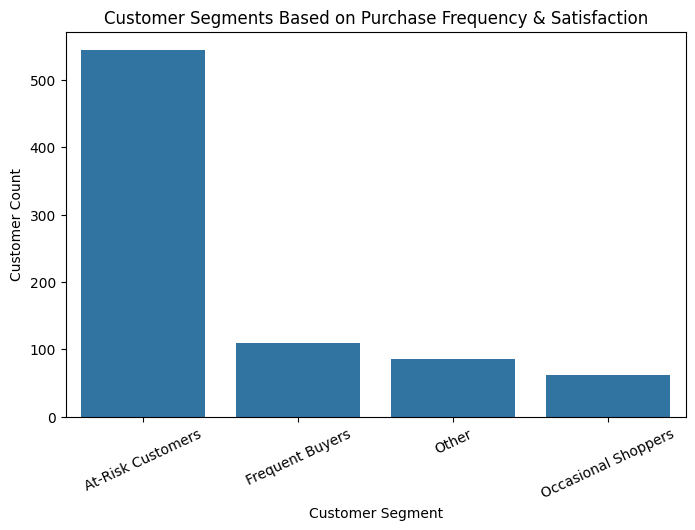

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Segment',
    order=df['Segment'].value_counts().index
)
plt.title("Customer Segments Based on Purchase Frequency & Satisfaction")
plt.xlabel("Customer Segment")
plt.ylabel("Customer Count")
plt.xticks(rotation=25)
plt.show()

In [106]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Improvement_Areas,transaction,Date,Year,Month,Day,Weekday,Personalized_Recommendation_Frequency_Encoded,Purchase_Frequency_Coded,Segment
0,2023-06-07,32,Prefer Not To Say,Multiple Times A Week,"[Groceries and Gourmet Food, Home and Kitchen]",Sometimes,Rarely,Categories,Multiple pages,5,...,Not Available,819284,2023-06-07,2023,6,7,Wednesday,2,4,At-Risk Customers
1,2023-06-07,47,Female,Multiple Times A Week,"[Groceries and Gourmet Food, Beauty and Person...",No,Few times a month,Unknown,First page,5,...,Shipping speed and reliability,599249,2023-06-07,2023,6,7,Wednesday,0,4,Frequent Buyers
2,2023-06-05,50,Female,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",Sometimes,Multiple times a day,Categories,Multiple pages,1,...,Reducing packaging waste,432245,2023-06-05,2023,6,5,Monday,2,1,At-Risk Customers
3,2023-06-07,6,Others,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",No,Rarely,Others,Multiple pages,1,...,Irrelevant product suggestions,476517,2023-06-07,2023,6,7,Wednesday,0,1,At-Risk Customers
4,2023-06-07,61,Male,Once A Week,"[Groceries and Gourmet Food, Clothing and Fash...",Yes,Rarely,Unknown,Multiple pages,5,...,Shipping speed and reliability,894659,2023-06-07,2023,6,7,Wednesday,1,3,At-Risk Customers


##### Analyze demographic or behavioral differences across these segments.

✅ 1. Demographic Differences Across Segments
 * A. Age comparison

In [107]:
# Age statistics by segment
age_segment = df.groupby('Segment')['age'].describe().round(2)
print(age_segment)

                     count   mean    std  min    25%   50%   75%   max
Segment                                                               
At-Risk Customers    544.0  36.14  18.66  3.0  19.00  38.0  53.0  67.0
Frequent Buyers      109.0  33.39  18.90  3.0  17.00  33.0  49.0  67.0
Occasional Shoppers   62.0  36.76  18.12  4.0  22.25  37.0  52.0  67.0
Other                 85.0  35.35  18.12  3.0  22.00  36.0  49.0  67.0


* B. Gender distribution by segment

In [108]:
gender_segment = pd.crosstab(
    index=df['Segment'],        
    columns=df['Gender'],          
    normalize='index'              
) * 100
gender_segment = gender_segment.round()
print(gender_segment)

Gender               Female  Male  Others  Prefer Not To Say
Segment                                                     
At-Risk Customers      25.0  25.0    25.0               25.0
Frequent Buyers        30.0  23.0    25.0               22.0
Occasional Shoppers    15.0  24.0    27.0               34.0
Other                  22.0  20.0    35.0               22.0


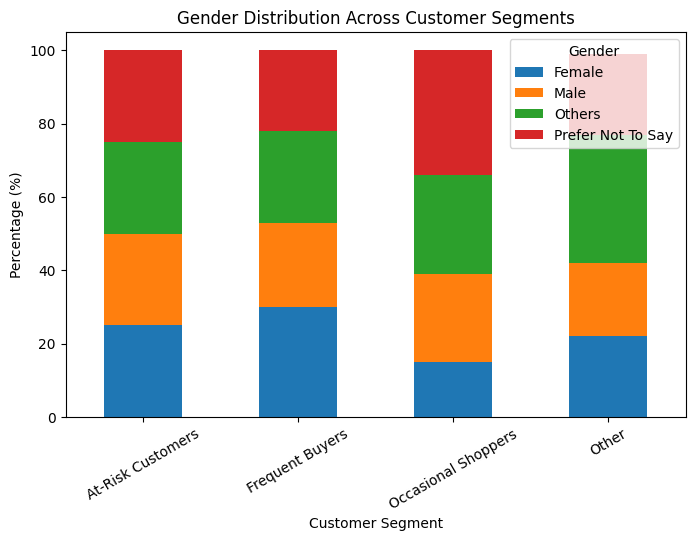

In [109]:
gender_segment.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Gender Distribution Across Customer Segments")
plt.xlabel("Customer Segment")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)
plt.show()

* A. Purchase frequency (coded)

In [110]:
purchase_segment = df.groupby('Segment')['Purchase_Frequency_Coded'].mean()
print(purchase_segment)

Segment
At-Risk Customers      1.430147
Frequent Buyers        3.541284
Occasional Shoppers    2.000000
Other                  2.964706
Name: Purchase_Frequency_Coded, dtype: float64


* B. Shopping satisfaction

In [111]:
satisfaction_segment = df.groupby('Segment')['Shopping_Satisfaction'].mean()
print(satisfaction_segment)

Segment
At-Risk Customers      2.338235
Frequent Buyers        4.477064
Occasional Shoppers    3.516129
Other                  3.705882
Name: Shopping_Satisfaction, dtype: float64


In [112]:
recommendation_segment = df.groupby('Segment')[
    'Personalized_Recommendation_Frequency_Encoded'
].mean()
print(recommendation_segment)

Segment
At-Risk Customers      0.981618
Frequent Buyers        0.880734
Occasional Shoppers    1.000000
Other                  1.047059
Name: Personalized_Recommendation_Frequency_Encoded, dtype: float64


* D. Cart completion behavior

In [113]:
cart_segment = df.groupby('Segment')['Cart_Completion_Frequency'].value_counts(normalize=True) * 100
print(cart_segment)

Segment              Cart_Completion_Frequency
At-Risk Customers    Sometimes                    22.794118
                     Always                       21.507353
                     Never                        20.772059
                     Often                        17.830882
                     Rarely                       17.095588
Frequent Buyers      Sometimes                    22.935780
                     Never                        22.018349
                     Rarely                       21.100917
                     Often                        17.431193
                     Always                       16.513761
Occasional Shoppers  Never                        25.806452
                     Rarely                       22.580645
                     Sometimes                    22.580645
                     Always                       14.516129
                     Often                        14.516129
Other                Never                        21.

In [114]:
segment_summary = df.groupby('Segment').agg({
    'age': 'mean',
    'Shopping_Satisfaction': 'mean',
    'Purchase_Frequency_Coded': 'mean',
    'Personalized_Recommendation_Frequency_Encoded': 'mean'
})
print(segment_summary)

                           age  Shopping_Satisfaction  \
Segment                                                 
At-Risk Customers    36.139706               2.338235   
Frequent Buyers      33.394495               4.477064   
Occasional Shoppers  36.758065               3.516129   
Other                35.352941               3.705882   

                     Purchase_Frequency_Coded  \
Segment                                         
At-Risk Customers                    1.430147   
Frequent Buyers                      3.541284   
Occasional Shoppers                  2.000000   
Other                                2.964706   

                     Personalized_Recommendation_Frequency_Encoded  
Segment                                                             
At-Risk Customers                                         0.981618  
Frequent Buyers                                           0.880734  
Occasional Shoppers                                       1.000000  
Other            

* Use clustering (e.g., K-Means) for behavioral grouping based on survey responses.

In [115]:
scatter_df = df[['Purchase_Frequency_Coded', 'Shopping_Satisfaction']].copy()

# Fill missing values for visualization
scatter_df = scatter_df.fillna(scatter_df.median())

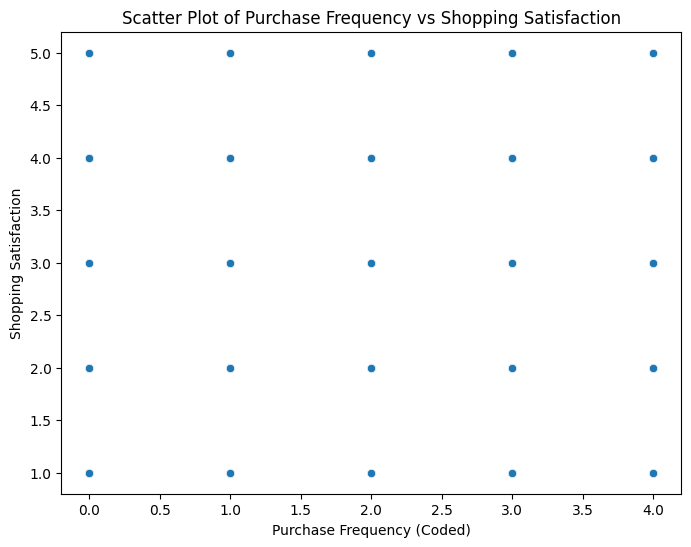

In [116]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scatter_df['Purchase_Frequency_Coded'],
    y=scatter_df['Shopping_Satisfaction']
)
plt.title("Scatter Plot of Purchase Frequency vs Shopping Satisfaction")
plt.xlabel("Purchase Frequency (Coded)")
plt.ylabel("Shopping Satisfaction")
plt.show()

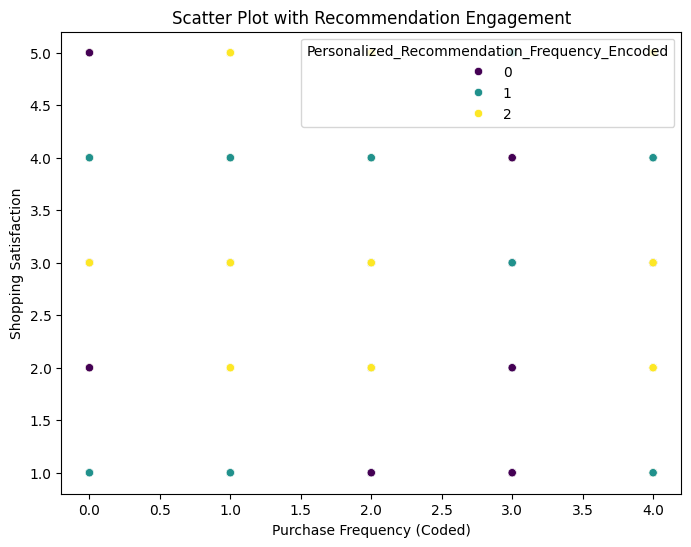

In [117]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Purchase_Frequency_Coded',
    y='Shopping_Satisfaction',
    hue='Personalized_Recommendation_Frequency_Encoded',
    palette='viridis'
)
plt.title("Scatter Plot with Recommendation Engagement")
plt.xlabel("Purchase Frequency (Coded)")
plt.ylabel("Shopping Satisfaction")
plt.show()

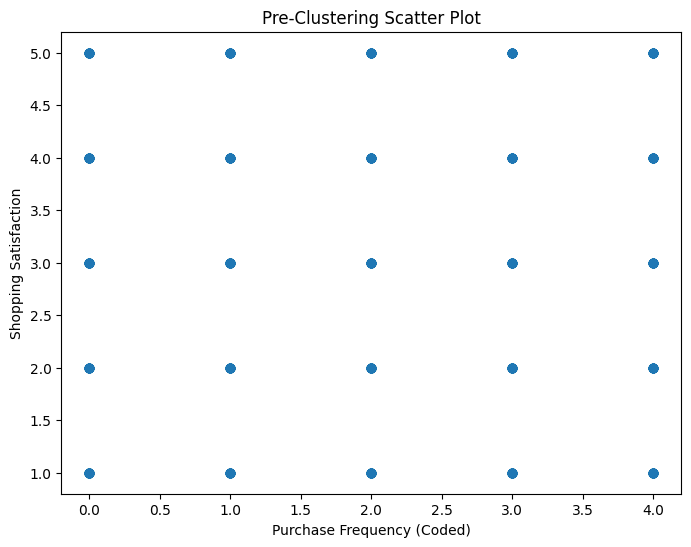

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(
    scatter_df['Purchase_Frequency_Coded'],
    scatter_df['Shopping_Satisfaction'],
    alpha=0.6
)
plt.title("Pre-Clustering Scatter Plot")
plt.xlabel("Purchase Frequency (Coded)")
plt.ylabel("Shopping Satisfaction")
plt.show()

In [119]:
cluster_features = [
    'Purchase_Frequency_Coded',
    'Shopping_Satisfaction',
    'Rating_Accuracy',
    'Personalized_Recommendation_Frequency_Encoded'
]

In [120]:
df_cluster = df[cluster_features].copy()

# Fill missing values with median (robust choice)
df_cluster = df_cluster.fillna(df_cluster.median())

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

In [122]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Behavior_Cluster'] = kmeans.fit_predict(X_scaled)

In [123]:
df['Behavior_Cluster'].value_counts()

Behavior_Cluster
1    290
2    259
0    251
Name: count, dtype: int64

In [124]:
cluster_summary = df.groupby('Behavior_Cluster')[cluster_features].mean()
print(cluster_summary)

                  Purchase_Frequency_Coded  Shopping_Satisfaction  \
Behavior_Cluster                                                    
0                                 2.318725               2.115538   
1                                 1.741379               4.337931   
2                                 1.749035               1.945946   

                  Rating_Accuracy  \
Behavior_Cluster                    
0                        3.637450   
1                        2.572414   
2                        3.127413   

                  Personalized_Recommendation_Frequency_Encoded  
Behavior_Cluster                                                 
0                                                      0.270916  
1                                                      0.893103  
2                                                      1.752896  


In [125]:
cluster_map = {
    0: 'High Engagement Customers',
    1: 'Moderate Engagement Customers',
    2: 'Low Engagement / At-Risk Customers'
}

df['Cluster_Label'] = df['Behavior_Cluster'].map(cluster_map)

In [126]:
df['Cluster_Label'].value_counts()

Cluster_Label
Moderate Engagement Customers         290
Low Engagement / At-Risk Customers    259
High Engagement Customers             251
Name: count, dtype: int64

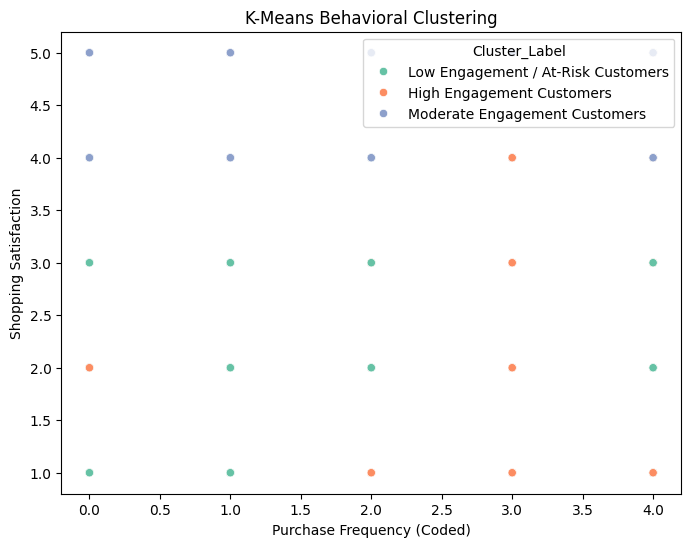

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Purchase_Frequency_Coded'],
    y=df['Shopping_Satisfaction'],
    hue=df['Cluster_Label'],
    palette='Set2'
)
plt.title("K-Means Behavioral Clustering")
plt.xlabel("Purchase Frequency (Coded)")
plt.ylabel("Shopping Satisfaction")
plt.show()

### Task: Customer Segmentation using K-Means Clustering
#### K-Means Clustering for Customer Segmentation

In [128]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [129]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'transaction', 'Date', 'Year', 'Month', 'Day', 'Weekday',
       'Personalized_Recommendation_Frequency_Encoded',
       'Purchase_Frequency_Coded', 'Segment', 'Behavior_Cluster',
       'Cluster_Label'],
      dtype='object')

In [130]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Date,Year,Month,Day,Weekday,Personalized_Recommendation_Frequency_Encoded,Purchase_Frequency_Coded,Segment,Behavior_Cluster,Cluster_Label
0,2023-06-07,32,Prefer Not To Say,Multiple Times A Week,"[Groceries and Gourmet Food, Home and Kitchen]",Sometimes,Rarely,Categories,Multiple pages,5,...,2023-06-07,2023,6,7,Wednesday,2,4,At-Risk Customers,2,Low Engagement / At-Risk Customers
1,2023-06-07,47,Female,Multiple Times A Week,"[Groceries and Gourmet Food, Beauty and Person...",No,Few times a month,Unknown,First page,5,...,2023-06-07,2023,6,7,Wednesday,0,4,Frequent Buyers,0,High Engagement Customers
2,2023-06-05,50,Female,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",Sometimes,Multiple times a day,Categories,Multiple pages,1,...,2023-06-05,2023,6,5,Monday,2,1,At-Risk Customers,2,Low Engagement / At-Risk Customers
3,2023-06-07,6,Others,Once A Month,"[Groceries and Gourmet Food, Beauty and Person...",No,Rarely,Others,Multiple pages,1,...,2023-06-07,2023,6,7,Wednesday,0,1,At-Risk Customers,1,Moderate Engagement Customers
4,2023-06-07,61,Male,Once A Week,"[Groceries and Gourmet Food, Clothing and Fash...",Yes,Rarely,Unknown,Multiple pages,5,...,2023-06-07,2023,6,7,Wednesday,1,3,At-Risk Customers,0,High Engagement Customers


In [131]:
df['transaction'].describe()

count       800.000000
mean     565664.540000
std      259825.653672
min      100154.000000
25%      337657.250000
50%      586346.500000
75%      790776.250000
max      999961.000000
Name: transaction, dtype: float64

In [132]:
# Selecting features for clustering
X = df[['Purchase_Frequency_Coded', 'Shopping_Satisfaction']]

# Handle missing values (important!)
X = X.dropna()

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [133]:
# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to dataframe
df.loc[X.index, 'Cluster'] = clusters

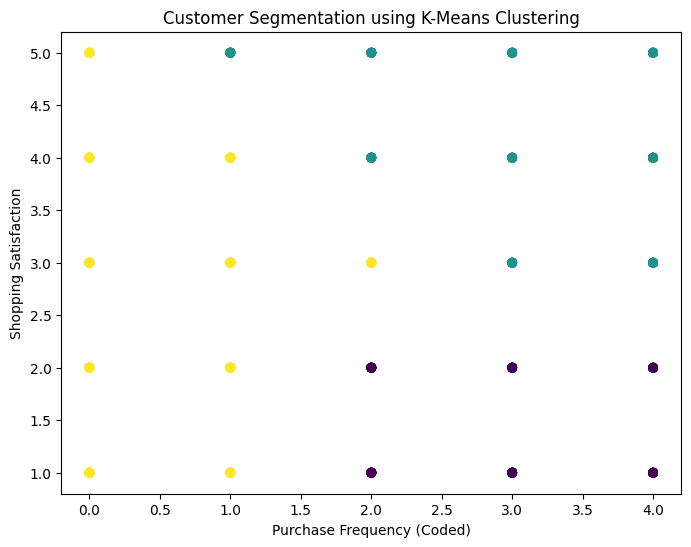

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(
    X['Purchase_Frequency_Coded'],
    X['Shopping_Satisfaction'],
    c=clusters
)
plt.xlabel("Purchase Frequency (Coded)")
plt.ylabel("Shopping Satisfaction")
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()

### Task: Market Basket Analysis using Apriori Algorithm
#### Association Rule Mining using Apriori Algorithm

In [135]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [136]:
# Prepare transactions
transactions = (
    df['Purchase_Categories']
    .dropna()
    .apply(lambda x: x if isinstance(x, list) else str(x).split(','))
    .tolist()
)

In [137]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

basket_df = pd.DataFrame(te_array, columns=te.columns_)

In [138]:
frequent_itemsets = apriori(
    basket_df,
    min_support=0.05,
    use_colnames=True
)

In [139]:
frequent_itemsets.sort_values(by='support', ascending=False).head()

,support,itemsets
1,0.56250,(Clothing and Fashion)
3,0.52625,(Home and Kitchen)
0,0.52250,(Beauty and Personal Care)
4,0.48750,(others)
2,0.45750,(Groceries and Gourmet Food)


In [140]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.5
)

In [141]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
0,(Beauty and Personal Care),(Clothing and Fashion),0.28000,0.535885,0.952685
1,(Groceries and Gourmet Food),(Beauty and Personal Care),0.23500,0.513661,0.983084
2,(Groceries and Gourmet Food),(Clothing and Fashion),0.26125,0.571038,1.015179
3,(Home and Kitchen),(Clothing and Fashion),0.30125,0.572447,1.017683
4,(Clothing and Fashion),(Home and Kitchen),0.30125,0.535556,1.017683


**Apriori Insight:**  
The Apriori algorithm identified frequently co-purchased product categories.
Strong association rules indicate that customers purchasing one category are
likely to purchase related categories, enabling cross-selling strategies.

##### 📌 Customer Segmentation (Clustering)

Using purchase frequency and shopping satisfaction:

High Engagement Customers: Frequent buyers with high satisfaction

Moderate Engagement Customers: Occasional buyers with average satisfaction

At-Risk Customers: Low satisfaction and/or low engagement

K-Means clustering with K = 3 was selected based on interpretability and business relevance rather than over-segmentation.

### Task 4: Recommendation and Review Insights 

* Examine the relationship between recommendation helpfulness and shopping
satisfaction.

In [142]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'transaction', 'Date', 'Year', 'Month', 'Day', 'Weekday',
       'Personalized_Recommendation_Frequency_Encoded',
       'Purchase_Frequency_Coded', 'Segment', 'Behavior_Cluster',
       'Cluster_Label', 'Cluster'],
      dtype='object')

In [143]:
# Descriptive Statistis
df['Shopping_Satisfaction'].describe()

count    800.000000
mean       2.866250
std        1.429481
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Shopping_Satisfaction, dtype: float64

In [144]:
df.groupby('Recommendation_Helpfulness')['Shopping_Satisfaction'].count()

Recommendation_Helpfulness
No           276
Sometimes    259
Yes          265
Name: Shopping_Satisfaction, dtype: int64

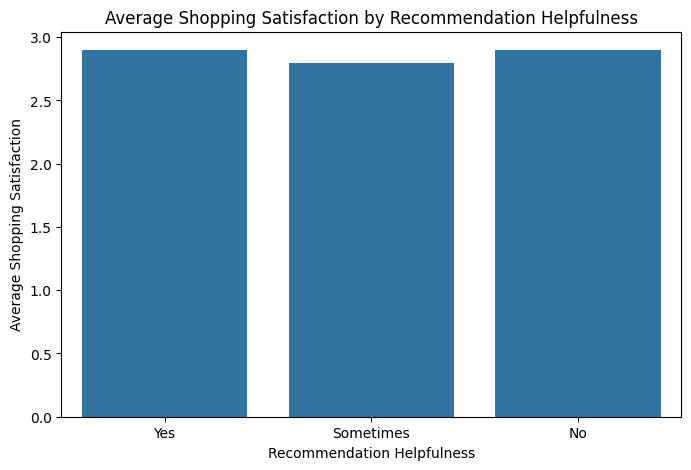

In [145]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='Recommendation_Helpfulness',
    y='Shopping_Satisfaction',
    estimator='mean',
    errorbar=None
)
plt.title("Average Shopping Satisfaction by Recommendation Helpfulness")
plt.xlabel("Recommendation Helpfulness")
plt.ylabel("Average Shopping Satisfaction")
plt.show()

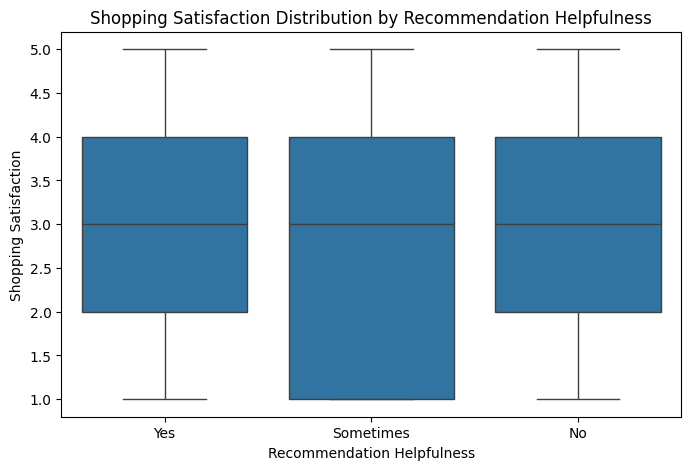

In [146]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Recommendation_Helpfulness',
    y='Shopping_Satisfaction'
)
plt.title("Shopping Satisfaction Distribution by Recommendation Helpfulness")
plt.xlabel("Recommendation Helpfulness")
plt.ylabel("Shopping Satisfaction")
plt.show()

* Evaluate how review reliability and helpfulness impact overall ratings.

In [147]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'transaction', 'Date', 'Year', 'Month', 'Day', 'Weekday',
       'Personalized_Recommendation_Frequency_Encoded',
       'Purchase_Frequency_Coded', 'Segment', 'Behavior_Cluster',
       'Cluster_Label', 'Cluster'],
      dtype='object')

In [148]:
df['Review_Helpfulness'].value_counts()

Review_Helpfulness
Sometimes    286
Yes          263
No           251
Name: count, dtype: int64

In [149]:
df['Review_Reliability'].value_counts()

Review_Reliability
Rarely          185
Never           164
Moderately      159
Heavily         150
Occasionally    142
Name: count, dtype: int64

In [150]:
## Encoding 'Review_Reliability', 'Review_Helpfulness'
helpfulness_map = {
    'No': 0,
    'Sometimes': 1,
    'Yes': 2
}

df['Review_Helpfulness_Encoded'] = df['Review_Helpfulness'].map(helpfulness_map)

reliability_map = {
    'Never': 0,
    'Rarely': 1,
    'Occasionally': 2,
    'Moderately': 3,
    'Heavily': 4
}

df['Review_Reliability_Encoded'] = df['Review_Reliability'].map(reliability_map)


In [151]:
df['Review_Helpfulness_Encoded'].corr(
    df['Rating_Accuracy'], method='spearman'
)

df['Review_Reliability_Encoded'].corr(
    df['Rating_Accuracy'], method='spearman'
)

0.06790854512144652

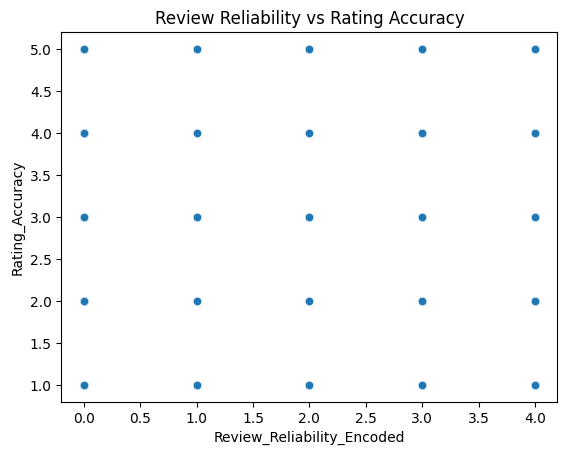

In [152]:
sns.scatterplot(
    x='Review_Reliability_Encoded',
    y='Rating_Accuracy',
    data=df,
    alpha=0.6
)
plt.title("Review Reliability vs Rating Accuracy")
plt.show()

In [153]:
corr_matrix = df[
    ['Review_Helpfulness_Encoded',
     'Review_Reliability_Encoded',
     'Rating_Accuracy']
].corr(method='spearman')

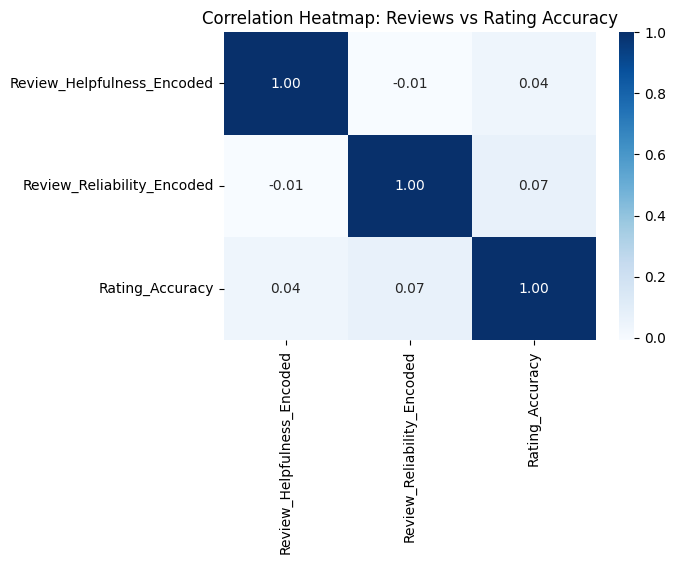

In [154]:
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    fmt='.2f'
)
plt.title("Correlation Heatmap: Reviews vs Rating Accuracy")
plt.show()

* Identify trends in how often customers engage with or trust personalized
recommendations.

In [155]:
df['Personalized_Recommendation_Frequency'].value_counts(normalize=True) * 100

Personalized_Recommendation_Frequency
No           34.875
Yes          32.625
Sometimes    32.500
Name: proportion, dtype: float64

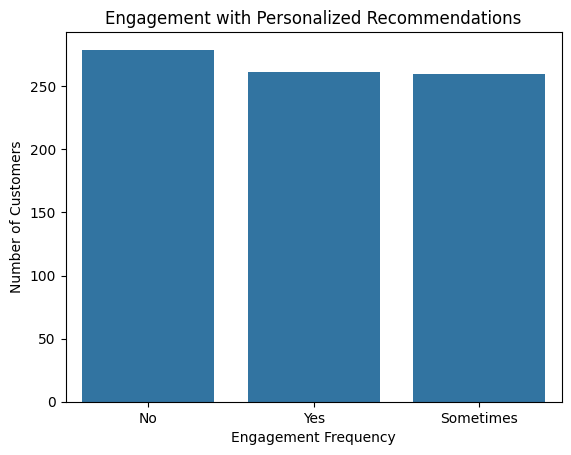

In [156]:
sns.countplot(
    data=df,
    x='Personalized_Recommendation_Frequency',
    order=df['Personalized_Recommendation_Frequency'].value_counts().index
)
plt.title("Engagement with Personalized Recommendations")
plt.xlabel("Engagement Frequency")
plt.ylabel("Number of Customers")
plt.show()

In [157]:
df['Recommendation_Helpfulness'].value_counts(normalize=True) * 100

Recommendation_Helpfulness
No           34.500
Yes          33.125
Sometimes    32.375
Name: proportion, dtype: float64

In [158]:
# Engagement vs Trust
Round_Recommendation = pd.crosstab(
    df['Personalized_Recommendation_Frequency'],
    df['Recommendation_Helpfulness'],
    normalize='index'
) * 100
Round_Recommendation.round()

Recommendation_Helpfulness,No,Sometimes,Yes
Personalized_Recommendation_Frequency,,,
No,34.0,33.0,33.0
Sometimes,32.0,37.0,30.0
Yes,37.0,26.0,36.0


In [159]:
df.groupby('Personalized_Recommendation_Frequency')['Shopping_Satisfaction'].mean().round(3)

Personalized_Recommendation_Frequency
No           2.867
Sometimes    2.738
Yes          2.992
Name: Shopping_Satisfaction, dtype: float64

In [160]:
df.groupby('Recommendation_Helpfulness')['Shopping_Satisfaction'].mean().round(3)

Recommendation_Helpfulness
No           2.899
Sometimes    2.799
Yes          2.898
Name: Shopping_Satisfaction, dtype: float64

##  Actionable Insights for Improving eBay’s Recommendation System:

The analysis indicates that customer engagement and trust in personalized recommendations are moderate, with many users reporting inconsistent usefulness. To improve effectiveness, eBay should enhance recommendation relevance by leveraging recent browsing behavior, purchase history, and category preferences. Segment-specific recommendation strategies can further improve engagement by tailoring suggestions for frequent buyers, occasional shoppers, and at-risk customers.

Increasing transparency by explaining why products are recommended can help build trust, while integrating review reliability and helpfulness into recommendation ranking can strengthen confidence in suggested items. Additionally, reducing inconsistency through continuous model evaluation and incorporating user feedback mechanisms can improve personalization quality. Prioritizing high-trust recommendations for at-risk customers can further enhance satisfaction and retention.

Overall, a more personalized, transparent, and feedback-driven recommendation system can significantly improve customer engagement and shopping satisfaction on eBay.

😊 Shopping Satisfaction

Average shopping satisfaction is moderate (around 3 on a 5-point scale).

Satisfaction levels are evenly spread, indicating mixed customer experiences.

Satisfaction is influenced by multiple factors, not recommendations alone.

##### Visual Insights Used

Bar charts for purchase categories and browsing frequency

Pie and bar charts for satisfaction distribution

Heatmaps for correlation analysis

Scatter plots for behavioral clustering and pre-cluster inspection

These visualizations made patterns easy to interpret and supported data-driven conclusions.

## Task 5: Visualization and Reporting

* Create attractive visualizations (bar charts, heatmaps, pie charts) for:

* Purchase categories

In [161]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Recommendation_Helpfulness', 'Rating_Accuracy',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'transaction', 'Date', 'Year', 'Month', 'Day', 'Weekday',
       'Personalized_Recommendation_Frequency_Encoded',
       'Purchase_Frequency_Coded', 'Segment', 'Behavior_Cluster',
       'Cluster_Label', 'Cluster', 'Review_Helpfulness_Encoded',
       'Review_Reliability_Encoded'],
      dtype='object')

In [162]:
df['Purchase_Categories'].value_counts()

Purchase_Categories
[Clothing and Fashion, others]                                                                            40
[Clothing and Fashion, Home and Kitchen, others]                                                          36
[Groceries and Gourmet Food, Beauty and Personal Care, Clothing and Fashion, Home and Kitchen]            35
[Groceries and Gourmet Food, Home and Kitchen]                                                            34
[Groceries and Gourmet Food, Clothing and Fashion, Home and Kitchen]                                      33
[Groceries and Gourmet Food, Beauty and Personal Care]                                                    33
[Beauty and Personal Care, Clothing and Fashion, Home and Kitchen]                                        33
[Beauty and Personal Care, Clothing and Fashion, Home and Kitchen, others]                                31
[others]                                                                                                  30

In [163]:
type(df['Purchase_Categories'].dropna().iloc[0])

list

In [164]:
categories = (
    df['Purchase_Categories']
    .dropna()
    .explode()
    .astype(str)
    .str.strip()
)

In [165]:
categories = (
    df['Purchase_Categories']
    .dropna()
    .apply(lambda x: x if isinstance(x, list) else str(x).split(','))
    .explode()
    .str.strip()
)

In [166]:
categories.value_counts()

Purchase_Categories
Clothing and Fashion          450
Home and Kitchen              421
Beauty and Personal Care      418
others                        390
Groceries and Gourmet Food    366
Name: count, dtype: int64

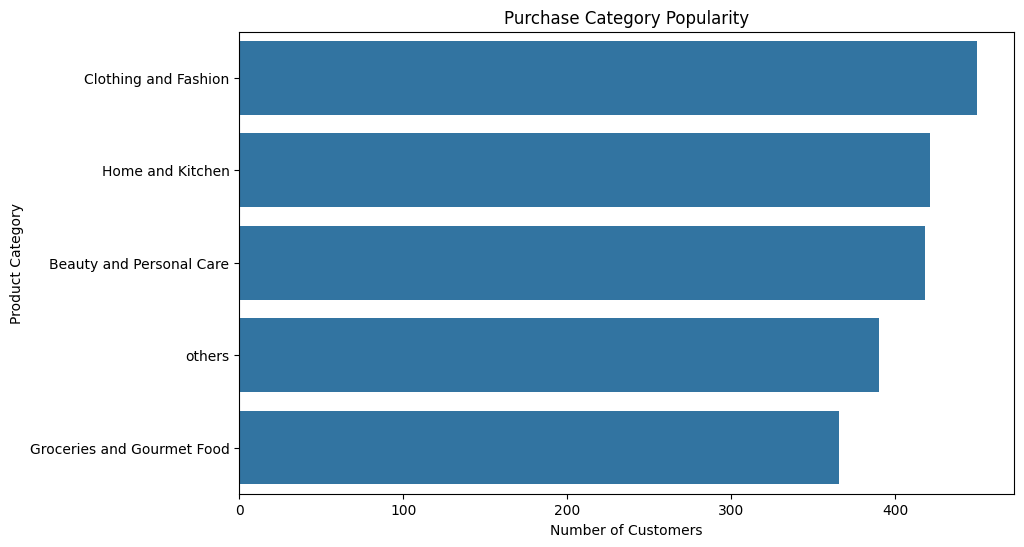

In [167]:
plt.figure(figsize=(10,6))
sns.countplot(
    y=categories,
    order=categories.value_counts().index
)
plt.title("Purchase Category Popularity")
plt.xlabel("Number of Customers")
plt.ylabel("Product Category")
plt.show()

* Browsing Frequency Distribution (Bar Chart)

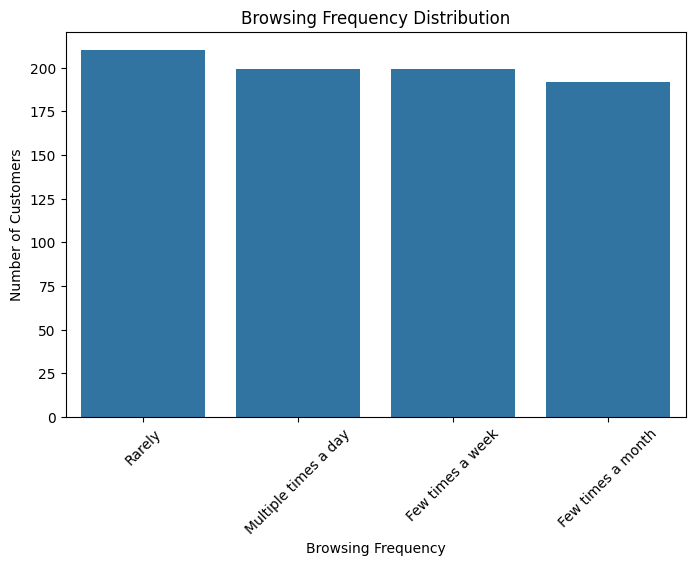

In [168]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='Browsing_Frequency',
    order=df['Browsing_Frequency'].value_counts().index
)
plt.title("Browsing Frequency Distribution")
plt.xlabel("Browsing Frequency")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

* Satisfaction Levels (Pie Chart + Bar Chart)

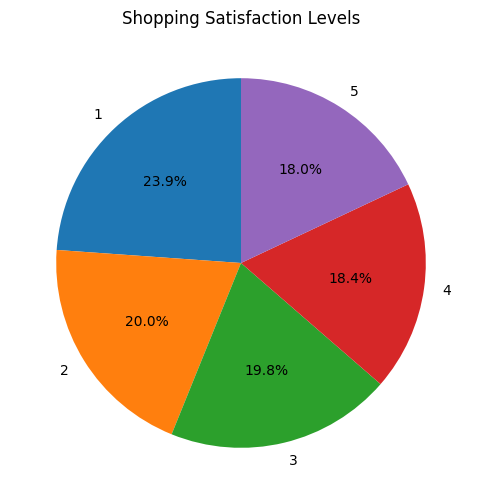

In [169]:
satisfaction_counts = df['Shopping_Satisfaction'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(
    satisfaction_counts,
    labels=satisfaction_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Shopping Satisfaction Levels")
plt.show()

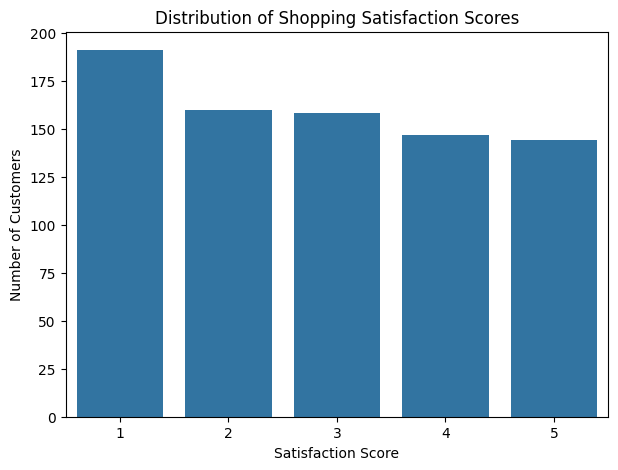

In [170]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x='Shopping_Satisfaction',
    order=sorted(df['Shopping_Satisfaction'].unique())
)
plt.title("Distribution of Shopping Satisfaction Scores")
plt.xlabel("Satisfaction Score")
plt.ylabel("Number of Customers")
plt.show()

* Correlation Between Recommendation Usefulness & Satisfaction (Heatmap)

In [171]:
df['Recommendation_Helpfulness'].value_counts()

Recommendation_Helpfulness
No           276
Yes          265
Sometimes    259
Name: count, dtype: int64

In [172]:
# Encoding the Data
helpfulness_map = {
    'No': 0,
    'Sometimes': 1,
    'Yes': 2
}

df['Recommendation_Helpfulness_Encoded'] = df['Recommendation_Helpfulness'].map(helpfulness_map)

In [173]:
corr_data = df[
    ['Recommendation_Helpfulness_Encoded', 'Shopping_Satisfaction']
].corr(method='spearman')

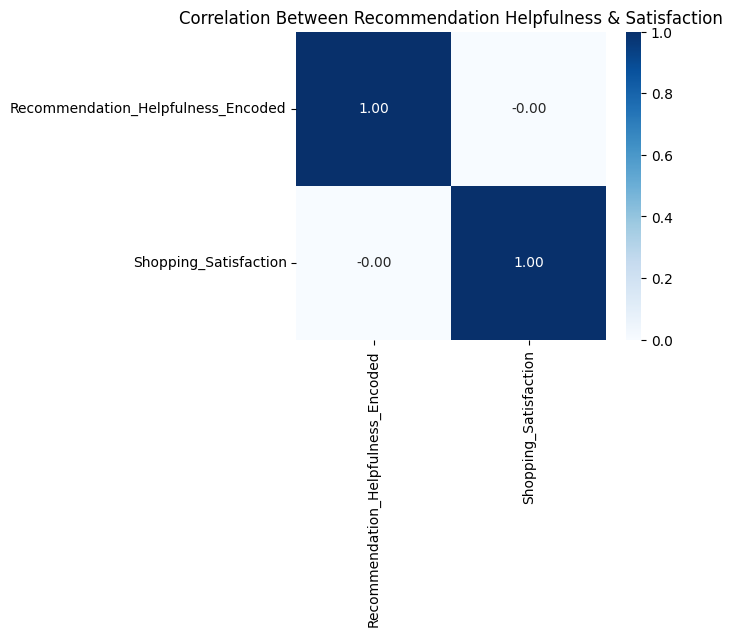

In [174]:
plt.figure(figsize=(5,4))
sns.heatmap(
    corr_data,
    annot=True,
    cmap='Blues',
    fmt='.2f'
)
plt.title("Correlation Between Recommendation Helpfulness & Satisfaction")
plt.show()

##### 📌 Actionable Recommendations for eBay

Improve Recommendation Relevance

Leverage browsing history, recent purchases, and category preferences.

Segment-Based Personalization

Tailor recommendations for frequent, occasional, and at-risk customers.

Increase Transparency

Explain why products are recommended to build trust.

Leverage Review Reliability

Prioritize products with trustworthy and verified reviews.

Reduce Inconsistency

Improve recommendation consistency to convert “Sometimes” users into “Yes”.

Use Feedback Loops

Allow users to provide quick feedback on recommendations.

## 📌 Conclusion

The analysis reveals that while personalized recommendations contribute positively to customer experience, their current impact is limited by inconsistent relevance and moderate trust. Improving recommendation quality, transparency, and review credibility—combined with segment-specific strategies—can significantly enhance customer engagement, satisfaction, and retention on the platform.